In [76]:
#This is some random plotting Tyler played around with after looking at a bunch of plots

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import panel as pn
import pandas as pd
import hvplot.pandas

In [3]:
#Creating normally distributed data
mu, sigma = 0, 0.1 # mean and standard deviation
mu2, sigma2 = 0.05, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
s2 = np.random.normal(mu2, sigma2, 500)

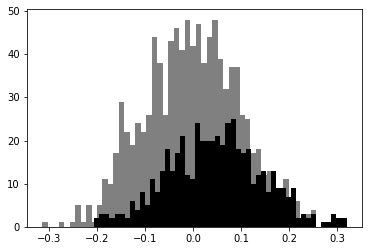

In [4]:
plt.hist(s, 50, color='grey')
plt.hist(s2, 50, color='black')

plt.show()

In [5]:
years=20

dummy_temp_data=np.zeros((years, 12))

for i in range(years):
    dummy_temp_data[i,:]=np.linspace(i,i+1, 12)
    
theta = np.linspace(0, 2*np.pi, 12)

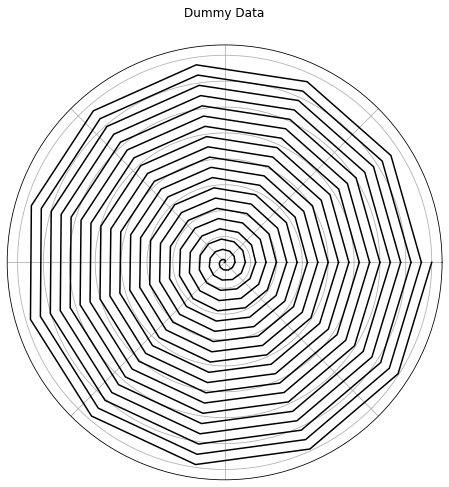

In [6]:
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111, projection='polar')
for i in range(years):
    ax1.plot(theta, dummy_temp_data[i,:], 'k')

    
ax1.axes.get_yaxis().set_ticklabels([])
ax1.axes.get_xaxis().set_ticklabels([])
ax1.set_title('Dummy Data')
plt.show()

In [168]:
xl_file='City_lat_lons.xlsx'

data_file = pd.read_excel (r'City_lat_lons.xlsx')
#Convert it to a numpy array as pandas confuse me
new_data_file=data_file.to_numpy()

#Start at 1 to cut off the first Nan column
cities=new_data_file[1:,0]
lats=new_data_file[1:,1]
lats_mins=new_data_file[1:,2]
new_lats_mins=np.char.split(lats_mins.astype('str'), sep=' ')
full_lats=np.zeros(120)
for i in range(0,120):
    if new_lats_mins[i][1]=='S':
        full_lats[i]=-lats[i]-int(new_lats_mins[i][0])/60
        full_lats[i]=full_lats[i].round(1)
    else:
        full_lats[i]=lats[i]+int(new_lats_mins[i][0])/60
        full_lats[i]=full_lats[i].round(1)

lons=new_data_file[1:,3]
lons_mins=new_data_file[1:,4]
new_lons_mins=np.char.split(lons_mins.astype('str'), sep=' ')
full_lons=np.zeros(120)
for i in range(0,120):
    if new_lons_mins[i][1]=='E':
        full_lons[i]=lons[i]+int(new_lons_mins[i][0])/60
        full_lons[i]=full_lons[i].round(1)
    else:
        full_lons[i]=(360-lons[i])-int(new_lons_mins[i][0])/60
        full_lons[i]=full_lons[i].round(1)

lats_lons=np.zeros((120,2))
for i in range(0,120):
    lats_lons[i]=([full_lats[i], full_lons[i]])
    
city_lat_lon_dict = dict(zip(cities, lats_lons))


In [170]:
#Create sample data
def mplplot(df, **kwargs):
    fig = df.plot().get_figure()
    plt.close(fig)
    return fig

def hvplot(df, **kwargs):
    return df.hvplot()

#def sine(frequency=1.0, amplitude=1.0, n=200, view_fn=mplplot):
    #xs = np.arange(n)/n*20.0
    #ys = amplitude*np.sin(frequency*xs)
    #df = pd.DataFrame(dict(y=ys), index=xs)
    #return view_fn(df, frequency=frequency, amplitude=amplitude, n=n)

#sine(1.5, 2.5)
    
def lat_lon_plot(city, view_plt=hvplot):
    lat=city_lat_lon_dict[city][0]
    lon=city_lat_lon_dict[city][1]

    df = pd.DataFrame(dict(y=sample_temp_data[lat, lon,:]), index=time_space)
    return view_plt(df, lat=lat, lon=lon)
#lat_lon_plot(1,1)

In [171]:

pn.extension()

{'one':1,'two':2}

#pn.interact(lat_lon_plot, lat=(0,5), lon=(0,5))
pn.interact(lat_lon_plot, city=['Seattle', 'NYC', 'LA', 'Chicago'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in power


Column
    [0] Column
        [0] Select(name='city', options=['Seattle', 'NYC', ...], value='Seattle')
    [1] Row
        [0] HoloViews(Curve, name='interactive01621')